In [14]:
from transformers import GPT2Tokenizer, AutoModelForCausalLM
from torch.nn.functional import log_softmax
import torch
import numpy as np
import json
from matplotlib import pyplot as plt
from tqdm import tqdm
import math

In [15]:
taskC_train = []
with open ("data/subtaskC_train.jsonl", "r", encoding="utf-8") as f:
    for line in f:
        if line:
            parsed = json.loads(line)
            taskC_train.append((parsed["text"], parsed["label"], parsed["id"]))
        

In [16]:
perplexities = None
with open("data/perplexities.json", "r") as f:
    perplexities = json.load(f)

In [17]:

def rolling_avg(arr, window_size=10):
    r = []
    i = 0
    while i < len(arr):
        mid = window_size // 2
        start = max(i - mid, 0)
        end = min(i + mid, len(arr) + 1)
        current = sum(arr[start:end]) / (end - start)
        r.append(current)
        i += 1
    return r    

In [18]:
def rolling_variance(arr, window_size=10):
    r = []
    i = 0
    while i < len(arr):
        mid = window_size // 2
        start = max(i - mid, 0)
        end = min(i + mid, len(arr) + 1)
        current = np.var(arr[start:end])
        r.append(current)
        i += 1
    return r

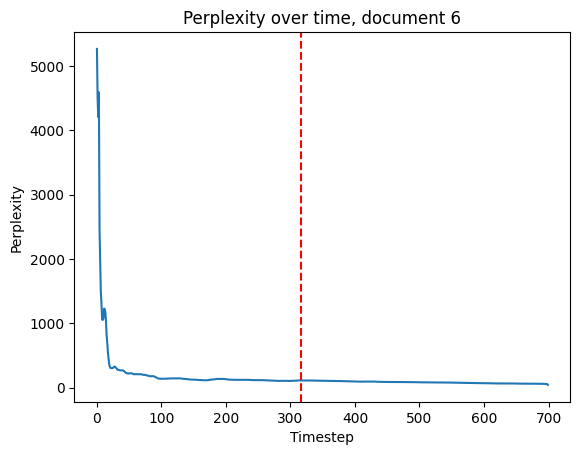

In [20]:
ith_doc = 6

boundary = taskC_train[ith_doc][1]

x = []
y = []
for i in range(len(perplexities[ith_doc])):
    x.append(i)
    y.append(perplexities[ith_doc][i])
    
y = rolling_avg(y, 5)
# y = rolling_variance(y, 5)

plt.plot(x, y)
plt.xlabel("Timestep")
plt.ylabel("Perplexity")
plt.title(f"Perplexity over time, document {ith_doc}")
plt.axvline(x=boundary, color="red", linestyle="--", label="boundary")
plt.show()